## Predictive model to identify customers more likely to take on a loan

In [5]:
#==============================================================================
# Import Packages
#==============================================================================
import os
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib qt
import string


# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#==============================================================================
# Setting Dimensions of plots
#==============================================================================
sns.set(rc={'figure.figsize':(11.7,8.27)})

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [1]:
#==============================================================================
# Importing Data 
#==============================================================================

base_path = 'C:/Users/aksha/Desktop/BOI_Challenge/'
test_path = base_path + 'Test Sample/'

# Set Directory
os.chdir('C:/Users/aksha/Desktop/BOI_Challenge/')

demogrphic_data_mdl = pd.read_csv("Model Build - Demographics.csv")
demogrphic_data_tst = pd.read_csv(test_path+"TEST - Demographics.csv")
demogrphic_data = pd.concat([demogrphic_data_mdl, demogrphic_data_tst], axis=0)

trgt_Prchsd_loan = pd.read_csv("Target Variable - Purchased Loan Flag.csv")

prcdt_hld_bank_mdl = pd.read_csv("Model Build - Product Held in Bank.csv")
prcdt_hld_bank_tst = pd.read_csv(test_path+"TEST - Product Held in Bank.csv")
prcdt_hld_bank = pd.concat([prcdt_hld_bank_mdl, prcdt_hld_bank_tst], axis=0)

prv_loan_hld_mdl = pd.read_csv("Model Build - Previous Loan Holdings.csv")
prv_loan_hld_tst = pd.read_csv(test_path+"TEST- Previous Loan Holdings.csv")
prv_loan_hld = pd.concat([prv_loan_hld_mdl, prv_loan_hld_tst], axis=0)
prv_loan_hld.tail()

County_data = pd.read_csv("County Lkp.csv")


txn_amt_data_mdl = pd.read_csv("Model Build - TXN Amount.csv")
txn_amt_data_tst = pd.read_csv(test_path+"TEST - TXN Amount.csv")
txn_amt_data = pd.concat([txn_amt_data_mdl, txn_amt_data_tst], axis=0)
txn_amt_data.head()


txn_CA_amt_data_mdl = pd.read_csv("Model Build - Transactions out of Current Account.csv")
txn_CA_amt_data_tst = pd.read_csv(test_path+"TEST - Transactions out of Current Account.csv")
txn_CA_amt_data = pd.concat([txn_CA_amt_data_tst,txn_CA_amt_data_mdl], axis=0)
txn_CA_amt_data.head()


NameError: name 'os' is not defined

In [132]:
# visualise and cleaning demographic data 
#print(demogrphic_data.shape)
#demogrphic_data.head()
#print(demogrphic_data.info())

#Change Column name
demogrphic_data.columns = ["Client_ID","Age","Gender","County","Income_Grp"]

#Check Duplicated Values
duplicte_ID = demogrphic_data[demogrphic_data['Client_ID'].duplicated(keep='first')]

# make a list of the client IDs which are duplicate
dplict_IDs_lst = [var for var in duplicte_ID['Client_ID']]

# print the duplicate rows to analyse
for var in dplict_IDs_lst:
    print(demogrphic_data[demogrphic_data['Client_ID'] == var]) 
    print(" ")

# Removing Duplicate Records
demogrphic_data.drop_duplicates(subset ="Client_ID",keep = 'first', inplace = True)
#print(demogrphic_data.shape)
#4 Duplicate Records dropped

#Check and Correct Gender Column
#demogrphic_data['Gender'].unique()

# creating a dict file  
gender = {'0':'F',0:'F','f':'F','fem':'F','female':'F',
          1:'M','1':'M','Male':'M','m':'M','M':'M'} 

demogrphic_data.Gender = [gender[item] for item in demogrphic_data.Gender] 
#print(demogrphic_data) 

#Check and Correct County Column
#demogrphic_data['County'].unique()

demogrphic_data['County'] = demogrphic_data['County'].str.replace('\d+','')

Cnty_mistke_list = ['Co.. ','Co. ','Co ','County ','County','County - ','City',' Town',' town',' -', '- ',' ']
Dulin_mistke_list = ['DÃ›blin','DubÃn','dublin','DubÝn','DÛblin']

for var in Cnty_mistke_list:
    demogrphic_data['County'] = demogrphic_data['County'].str.replace(var,'')

for var in Dulin_mistke_list:
    demogrphic_data['County'] = demogrphic_data['County'].str.replace(var,'Dublin')

demogrphic_data['County'] = demogrphic_data['County'].str.capitalize()
demogrphic_data['County'].replace(np.nan,'',inplace=True)


#Cleaning Income Group Column
#print(string.punctuation)
income_list = demogrphic_data['Income_Grp'].unique()
income_list
demogrphic_data['Income_Grp'] = demogrphic_data['Income_Grp'].str.replace('[^0-9+]+','-')
for var in income_list:
    if var == '10002 - 40000':
        demogrphic_data['Income_Grp'] = demogrphic_data['Income_Grp'].str.replace('10002 - 40000','10001-40000')
  


array(['10001-40000', '0-10000', '40001-60000', '60001-100000', '100000+'],
      dtype=object)

In [7]:
#demogrphic_data.columns = ["Client_ID","Age","Gender","County","Income_Grp"]
#demogrphic_data['Income_Grp'].unique()
#txn_amt_data["Avg_amt_CA_txn"].unique()

In [308]:
# visualise and cleaning Target Purchase Loan Data
#print(trgt_Prchsd_loan.shape)
#trgt_Prchsd_loan.head()
#print(trgt_Prchsd_loan.info())

#Change Column name
trgt_Prchsd_loan.columns = ["Client_ID","Loan_Flag"]

#Check Duplicated Values
duplicte_ID_targt = trgt_Prchsd_loan[trgt_Prchsd_loan['Client_ID'].duplicated(keep='first')]

# make a list of the client IDs which are duplicate
dplict_IDs_targt_lst = [var for var in duplicte_ID_targt['Client_ID']]

# print the duplicate rows to analyse
for var in dplict_IDs_targt_lst:
    print(trgt_Prchsd_loan[trgt_Prchsd_loan['Client_ID'] == var]) 
    print(" ")

# Removing Duplicate Records
trgt_Prchsd_loan.drop_duplicates(subset ="Client_ID",keep = 'first', inplace = True)
#print(trgt_Prchsd_loan.shape)
#4 Duplicate Records dropped

In [200]:
# visualise and cleaning Product Held in Bank data
#print(prcdt_hld_bank.shape)
#prcdt_hld_bank.head()
#print(prcdt_hld_bank.info())

#Change Column name
prcdt_hld_bank.columns = ["Client_ID","Prod_Held_Count"]

#Check Duplicated Values
duplicte_ID_prdct = prcdt_hld_bank[prcdt_hld_bank['Client_ID'].duplicated(keep='first')]

# make a list of the client IDs which are duplicate
duplicte_ID_prdct_lst = [var for var in duplicte_ID_prdct['Client_ID']]

# print the duplicate rows to analyse
for var in duplicte_ID_prdct_lst:
    print(prcdt_hld_bank[prcdt_hld_bank['Client_ID'] == var]) 
    print(" ")

# Removing Duplicate Records
prcdt_hld_bank.drop_duplicates(subset ="Client_ID",keep = 'first', inplace = True)
#print(prcdt_hld_bank.shape)

#prcdt_hld_bank["Prod_Held_Count"].unique()

prcdt_hld_bank["Prod_Held_Count"].replace(1,'1',inplace=True)
prcdt_hld_bank["Prod_Held_Count"].replace(2,'2',inplace=True)
prcdt_hld_bank["Prod_Held_Count"].replace(3,'3',inplace=True)
prcdt_hld_bank["Prod_Held_Count"].replace(4,'4',inplace=True)
prcdt_hld_bank["Prod_Held_Count"].replace(5,'5',inplace=True)

#prcdt_hld_bank["Prod_Held_Count"].unique()
print(prcdt_hld_bank.shape)


(12000, 2)


In [201]:
# visualise and cleaning Previous Loan in Holding Data
#print(prv_loan_hld.shape)
#prv_loan_hld.head()
#print(prv_loan_hld.info())

#Change Column name
prv_loan_hld.columns = ["Client_ID","Prv_Loan_Flag"]

#Check Duplicated Values
duplicte_ID_prv_loan = prv_loan_hld[prv_loan_hld['Client_ID'].duplicated(keep='first')]

# make a list of the client IDs which are duplicate
duplicte_ID_prv_loan_lst = [var for var in duplicte_ID_prv_loan['Client_ID']]

# print the duplicate rows to analyse
for var in duplicte_ID_prv_loan_lst:
    print(prv_loan_hld[prv_loan_hld['Client_ID'] == var]) 
    print(" ")

# Removing Duplicate Records
prv_loan_hld.drop_duplicates(subset ="Client_ID",keep = 'first', inplace = True)
#print(prv_loan_hld.shape)
#5 Duplicate Records dropped


#Check and Correct Previous Loan Held Column
#prv_loan_hld['Prv_Loan_Flag'].unique()

prv_loan_hld['Prv_Loan_Flag'].replace('³','',inplace=True)
prv_loan_hld['Prv_Loan_Flag'].replace(' €-   ','',inplace=True)
#prv_loan_hld['Prv_Loan_Flag'].replace(0,'0',inplace=True)
#prv_loan_hld['Prv_Loan_Flag'].replace(1,'1',inplace=True)
#prv_loan_hld['Prv_Loan_Flag'].unique()

print(prv_loan_hld.shape)

(20004, 2)


In [225]:
# visualise and cleaning Transaction Loan Data
#print(txn_amt_data.shape)
#txn_amt_data.head()
#print(txn_amt_data.info())

#Change Column name
txn_amt_data.columns = ["Client_ID","Avg_amt_CA_txn"]

#Check Duplicated Values
duplicte_ID_txn_amt = txn_amt_data[txn_amt_data['Client_ID'].duplicated(keep='first')]

# make a list of the client IDs which are duplicate
duplicte_ID_txn_amt_lst = [var for var in duplicte_ID_txn_amt['Client_ID']]

# print the duplicate rows to analyse
for var in duplicte_ID_txn_amt_lst:
    print(txn_amt_data[txn_amt_data['Client_ID'] == var]) 
    print(" ")

# Removing Duplicate Records
txn_amt_data.drop_duplicates(subset ="Client_ID",keep = 'first',inplace = True)
#print(txn_amt_data.shape)
#4 Duplicate Records dropped

txn_amt_data['Avg_amt_CA_txn'] = txn_amt_data['Avg_amt_CA_txn'].str.replace('€ ','')
txn_amt_data['Avg_amt_CA_txn'] = txn_amt_data['Avg_amt_CA_txn'].str.replace(',','')

txn_amt_data['Avg_amt_CA_txn'].unique()
#print(txn_amt_data.shape)

array([  58., 2663.,   46., ..., 1628.,  855., 1373.])

In [176]:
# visualise and cleaning County Data

County_data_mod = County_data.drop(County_data.index[0])

#print(txn_amt_data.shape)
#County_data_mod.head()
#print(County_data_mod.info())

County_data_shrt = County_data_mod.drop(["SNo","Rank","Change since"], axis=1)

#Change Column name
County_data_shrt.columns = ["County","Population","Density_km_sq","Province"]

#County_data_shrt.head()
County_data_shrt['County'].unique()


array(['Dublin', 'Antrim', 'Down', 'Cork', 'Fingal', 'South Dublin',
       'Galway', 'Londonderry', 'Kildare', 'Dun Laoghaire-Rathdown',
       'Limerick', 'Meath', 'Tyrone', 'Armagh', 'Donegal', 'Tipperary',
       'Kerry', 'Wexford', 'Wicklow', 'Mayo', 'Louth', 'Clare',
       'Waterford', 'Kilkenny', 'South Tipperary', 'Westmeath', 'Laois',
       'Offaly', 'Cavan', 'North Tipperary', 'Sligo', 'Roscommon',
       'Fermanagh', 'Monaghan', 'Carlow', 'Longford', 'Leitrim',
       'Average', 'Ireland', nan], dtype=object)

In [194]:
#txn_CA_amt_data.head()

txn_CA_amt_data.columns = ["Client_ID","Num_txns","Lst_txn_amt","Mrchnt_cde","Lst_txn_Nrtve"]

#Check Duplicated Values
duplicte_txn_CA_amt_data = txn_CA_amt_data[txn_CA_amt_data['Client_ID'].duplicated(keep='first')]

# make a list of the client IDs which are duplicate
duplicte_txn_CA_amt_data_lst = [var for var in duplicte_txn_CA_amt_data['Client_ID']]

# print the duplicate rows to analyse
for var in duplicte_txn_CA_amt_data_lst:
    print(txn_CA_amt_data[txn_CA_amt_data['Client_ID'] == var]) 
    print(" ")
    
# Removing Duplicate Records
txn_CA_amt_data.drop_duplicates(subset ="Client_ID",keep = 'first',inplace = True)
#print(txn_amt_data.shape)
#4 Duplicate Records dropped

#txn_CA_amt_data["Mrchnt_cde"] = txn_CA_amt_data["Mrchnt_cde"].astype(object)
txn_CA_amt_data["Lst_txn_Nrtve"].unique()

array([nan, 'THE BRIDGE LAUNDRY       WICKLOW TOWN',
       'LUXOR HOTEL/CASINO       LAS VEGAS    NV', ...,
       'WYNDHAM RESORT ANAHEIM   GARDEN GROVE CA',
       'YellowPlum               +17862203317',
       'ZUERICH APARTHOTEL       OPFIKON'], dtype=object)

In [226]:
#Combine all data columns
demogrphic_County_data = pd.merge(left=demogrphic_data, right=County_data_shrt, how='left', left_on='County', right_on='County')

demoG_Cnty_PrdHld_data = pd.merge(left=demogrphic_County_data, right=prcdt_hld_bank, how='left', left_on='Client_ID', right_on='Client_ID')

demoG_Cnty_PrdHld_PrvLn_data = pd.merge(left=demoG_Cnty_PrdHld_data, right=prv_loan_hld, how='left', left_on='Client_ID', right_on='Client_ID')

demoG_Cnty_PrdHld_PrvLn_TxnAmt_data = pd.merge(left=demoG_Cnty_PrdHld_PrvLn_data, right=txn_amt_data, how='left', left_on='Client_ID', right_on='Client_ID')

demoG_Cnty_PrdHld_PrvLn_TxnAmt_txn_CA_amt_data = pd.merge(left=demoG_Cnty_PrdHld_PrvLn_TxnAmt_data, right=txn_CA_amt_data, how='left', left_on='Client_ID', right_on='Client_ID')

demoG_Cnty_PrdHld_PrvLn_TxnAmt_txn_CA_amt_TrgLn_data = pd.merge(left=demoG_Cnty_PrdHld_PrvLn_TxnAmt_txn_CA_amt_data, right=trgt_Prchsd_loan, how='left', left_on='Client_ID', right_on='Client_ID')

In [228]:
#Writing Complete Master Data to CSV
demoG_Cnty_PrdHld_PrvLn_TxnAmt_txn_CA_amt_TrgLn_data.to_csv('Master_Data.csv', encoding='utf-8', index=False)

## Data Analysis

In [273]:
# load dataset
master_data = pd.read_csv('Master_Data.csv')

# rows and columns of the data
print(master_data.shape)

# visualise the dataset
master_data.head()

(12000, 16)


,Client_ID,Age,Gender,County,Income_Grp,Population,Density_km_sq,Province,Prod_Held_Count,Prv_Loan_Flag,Avg_amt_CA_txn,Num_txns,Lst_txn_amt,Mrchnt_cde,Lst_txn_Nrtve,Loan_Flag
0,1,36,M,Cork,10001-40000,519032.0,69.0,Munster,4.0,1.0,58,0,NaN,NaN,NaN,0.0
1,2,43,M,Cavan,0-10000,73183.0,37.7,Ulster,4.0,0.0,2663,17,83.66,7211.0,THE BRIDGE LAUNDRY WICKLOW TOWN,0.0
2,3,32,F,Dublin,10001-40000,1273069.0,1380.8,Leinster,2.0,0.0,46,25,526.18,3667.0,LUXOR HOTEL/CASINO LAS VEGAS NV,0.0
3,4,52,M,Louth,40001-60000,122897.0,148.7,Leinster,2.0,1.0,0,13,70.68,5712.0,HARVEY NORMAN CARRICKMINES,0.0
4,5,63,F,Kilkenny,60001-100000,95419.0,46.0,Leinster,1.0,0.0,126,39,259.07,5999.0,PAYPAL *PETEWOODWAR 35314369001,0.0


In [275]:
master_data["Mrchnt_cde"] = master_data["Mrchnt_cde"].astype(object)
print(master_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 16 columns):
Client_ID          12000 non-null int64
Age                12000 non-null int64
Gender             12000 non-null object
County             11991 non-null object
Income_Grp         12000 non-null object
Population         11978 non-null float64
Density_km_sq      11978 non-null float64
Province           11978 non-null object
Prod_Held_Count    11999 non-null float64
Prv_Loan_Flag      11995 non-null float64
Avg_amt_CA_txn     12000 non-null int64
Num_txns           12000 non-null int64
Lst_txn_amt        8722 non-null float64
Mrchnt_cde         8722 non-null object
Lst_txn_Nrtve      8722 non-null object
Loan_Flag          10000 non-null float64
dtypes: float64(6), int64(4), object(6)
memory usage: 1.5+ MB
None


**Missing values**

Let's go ahead and find out which variables of the dataset contain missing values

In [276]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in master_data.columns if master_data[var].isnull().sum()>1 
                and var not in ['Client_ID','Loan_Flag']]

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(master_data[var].isnull().mean(), 3),  ' % missing values')

County 0.001  % missing values
Population 0.002  % missing values
Density_km_sq 0.002  % missing values
Province 0.002  % missing values
Prv_Loan_Flag 0.0  % missing values
Lst_txn_amt 0.273  % missing values
Mrchnt_cde 0.273  % missing values
Lst_txn_Nrtve 0.273  % missing values


Our dataset contains a few variables with missing values. We need to account for this in following step, where we will engineer the variables for use in Machine Learning Models.

**Check zero values**

In [295]:
# make a list of the variables that contain zero values
vars_with_zero = [var for var in master_data.columns if master_data[var].isin([0]).sum()>1 
                  and var not in ['Client_ID','Loan_Flag','Prv_Loan_Flag']]

# print the variable name and the percentage of missing values
for var in vars_with_zero:
    print(var, np.round(master_data[var].isin([0]).mean(), 3),  ' % zero values')

Avg_amt_CA_txn 0.379  % zero values
Num_txns 0.276  % zero values


**Relationship between values being missing and Loan Purchased or not**

Let's evaluate count of the loans (Purchased or not) for those cases where the information is missing, for each variable.

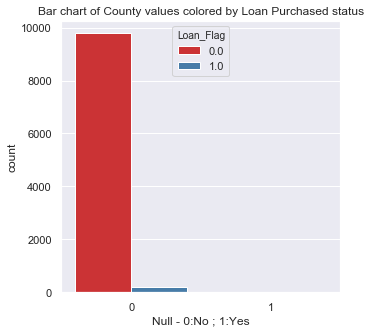

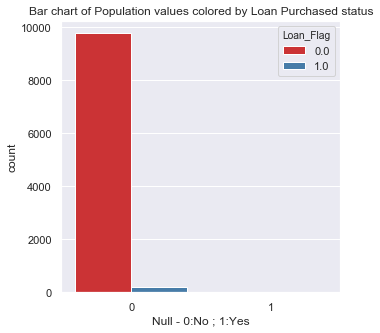

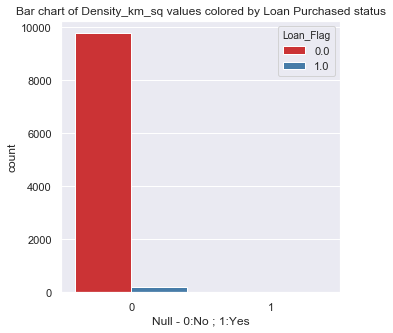

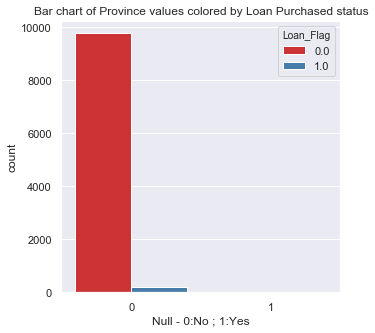

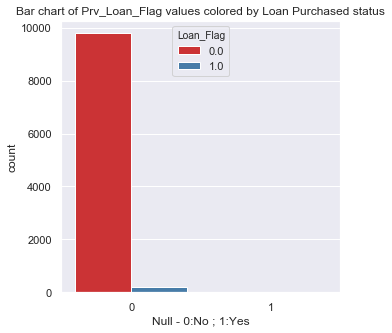

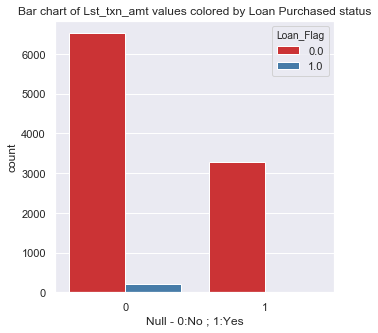

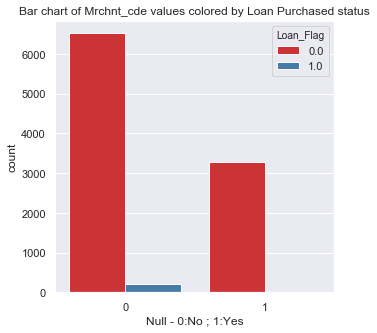

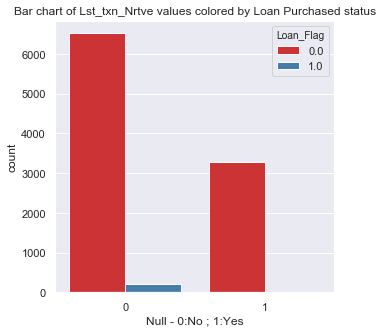

In [251]:
def analyse_na_value(df, var):
    df = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # let's calculate the count of Loans where the information is missing or present
    plt.figure(figsize=(5,5))
    sns.countplot(x=var,hue='Loan_Flag',data=df,palette='Set1')
    plt.title("Bar chart of " +var+ " values colored by Loan Purchased status", fontsize=12)
    plt.xlabel("Null - 0:No ; 1:Yes", fontsize=12)
    
for var in vars_with_na:
    analyse_na_value(master_data, var)

We can see that there are lot of values missing for Last Transaction Amount, Merchant Code, Last Transaction Details. Whereas other columns don't have significant count of missing values. The missing values will be captured once we engineer these values in the following stage.

**Relationship between values being zero and Loan Purchased or not**

Let's evaluate count of the loans (Purchased or not) for those cases where the value is 0, for each variable.

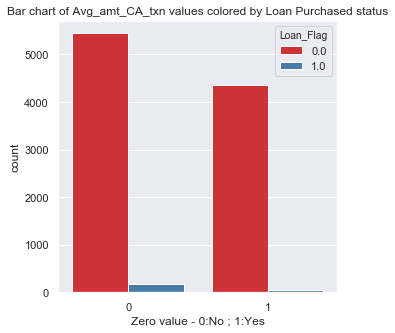

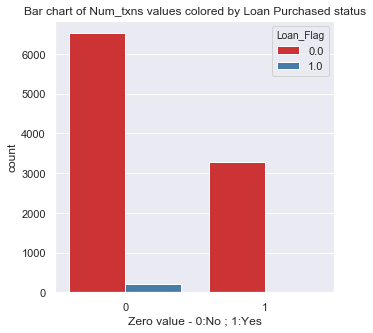

In [297]:
def analyse_zro_value(df, var):
    df = df.copy()
    
    # let's make a variable that indicates 1 if the observation is 0 or zero otherwise
    df[var] = np.where(df[var].isin([0]), 1, 0)
    
    # let's calculate the count of Loans where the information is zero or otherwise
    plt.figure(figsize=(5,5))
    sns.countplot(x=var,hue='Loan_Flag',data=df,palette='Set1')
    plt.title("Bar chart of " +var+ " values colored by Loan Purchased status", fontsize=12)
    plt.xlabel("Zero value - 0:No ; 1:Yes", fontsize=12)
    
for var in vars_with_zero:
    analyse_zro_value(master_data, var)

From the above graph we can see that 'Avg Amount of CA transaction' and 'Number of Transactions' contain significant amount of zero values. We will take care of it in the following Feature Engineering step.

**Numerical variables**

Let's go ahead and find out what numerical variables we have in the dataset

In [277]:
# list of numerical variables
num_vars = [var for var in master_data.columns if master_data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
master_data[num_vars].head()

Number of numerical variables:  10


,Client_ID,Age,Population,Density_km_sq,Prod_Held_Count,Prv_Loan_Flag,Avg_amt_CA_txn,Num_txns,Lst_txn_amt,Loan_Flag
0,1,36,519032.0,69.0,4.0,1.0,58,0,NaN,0.0
1,2,43,73183.0,37.7,4.0,0.0,2663,17,83.66,0.0
2,3,32,1273069.0,1380.8,2.0,0.0,46,25,526.18,0.0
3,4,52,122897.0,148.7,2.0,1.0,0,13,70.68,0.0
4,5,63,95419.0,46.0,1.0,0.0,126,39,259.07,0.0


From the above view of the dataset, we notice the variable Client_ID, which is an indicator of the clients. We will not use this variable to make our predictions, as there is one different value of the variable per each row, i.e., each client in the dataset. See below

In [253]:
print('Number of Client Id labels: ', len(master_data.Client_ID.unique()))
print('Number of Houses in the Dataset: ', len(master_data))

Number of Client Id labels:  12000
Number of Houses in the Dataset:  12000


**Discrete variables**

Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [278]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if len(master_data[var].unique())<20 and var not in ['Client_ID','Loan_Flag']]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  2


In [279]:
# let's visualise the discrete variables
master_data[discrete_vars].head()

,Prod_Held_Count,Prv_Loan_Flag
0,4.0,1.0
1,4.0,0.0
2,2.0,0.0
3,2.0,1.0
4,1.0,0.0


We can see that these variables refer to Product Held Count and Previous Loan Flag. Let's go ahead and analyse their contribution to the Loan Purchased or not.

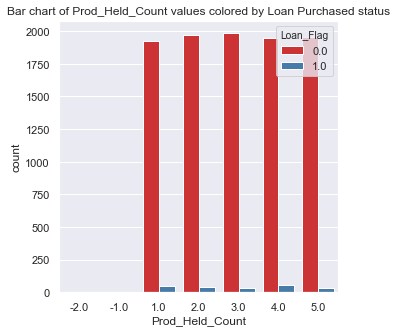

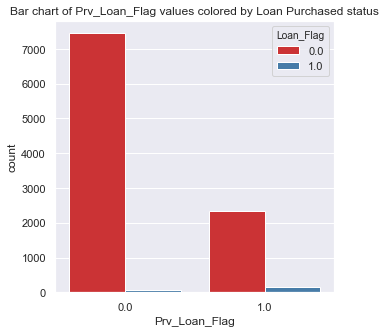

In [280]:
def analyse_discrete(df, var):
    df = df.copy()
    plt.figure(figsize=(5,5))
    sns.countplot(x=var,hue='Loan_Flag',data=df,palette='Set1')
    plt.title("Bar chart of " +var+ " values colored by Loan Purchased status", fontsize=12)
    #plt.xlabel("Null - 0:No ; 1:Yes", fontsize=12)
    
for var in discrete_vars:
    analyse_discrete(master_data,var)

We can see that there is no monotonic relationship between the variables and Loan Purchased.
Adding to it, other observations are as follows:
1. Product Held is a significant variable because they have contributed to the likelyhood of purchasing loan. With 1,2 or 4 products contributed to higher likelyhood as compared with 3 or 5. It contains wring value (-1 and -2) which will be corrected in the following step.
2. Previous Loan holding is also a significant variable in loan purchasing likelyhood becuase previous loan holder are more likely to buy another loan as compared to people with no previous loan.

#### Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous all those that are not temporal(date) or discrete variables in our dataset.

In [298]:
# list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars+['Client_ID','Loan_Flag']]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  6


In [299]:
# let's visualise the continuous variables
master_data[cont_vars].head()

,Age,Population,Density_km_sq,Avg_amt_CA_txn,Num_txns,Lst_txn_amt
0,36,519032.0,69.0,58,0,NaN
1,43,73183.0,37.7,2663,17,83.66
2,32,1273069.0,1380.8,46,25,526.18
3,52,122897.0,148.7,0,13,70.68
4,63,95419.0,46.0,126,39,259.07


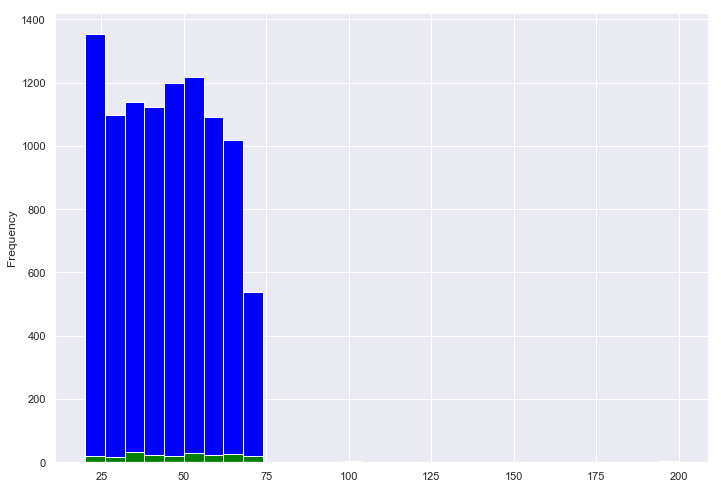

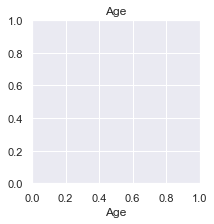

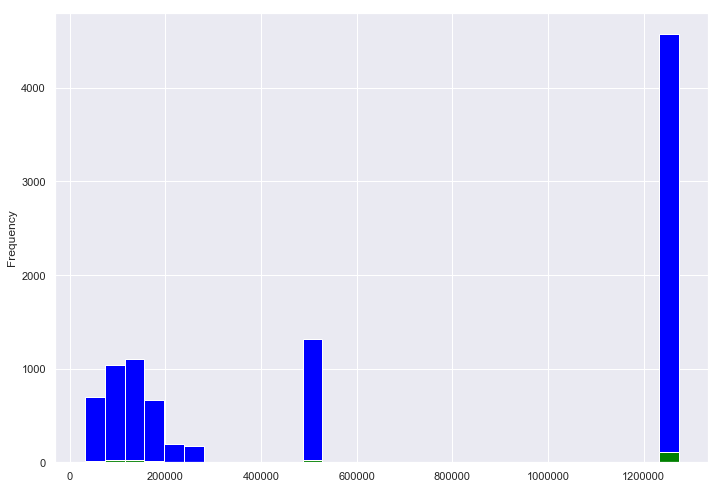

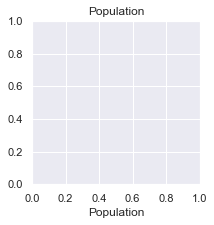

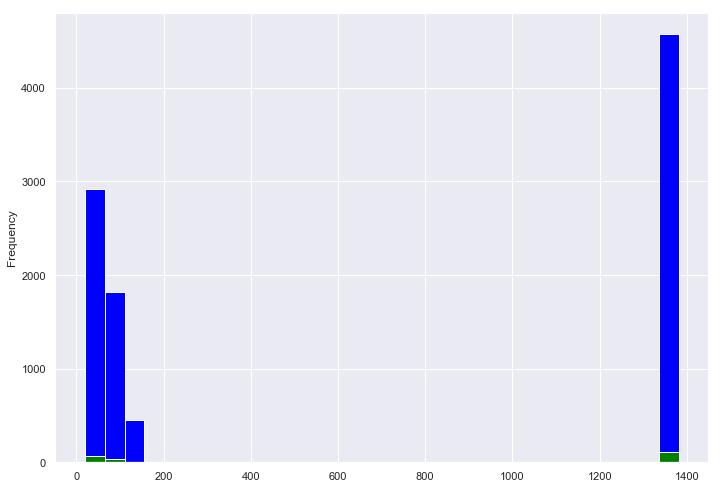

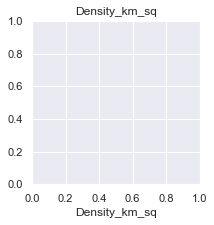

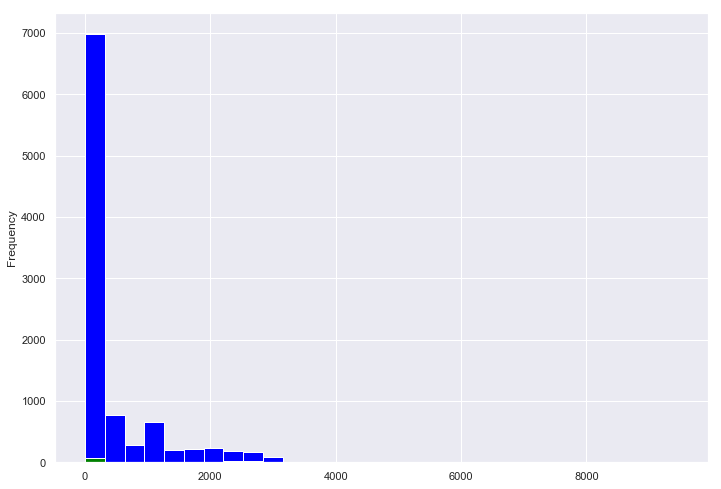

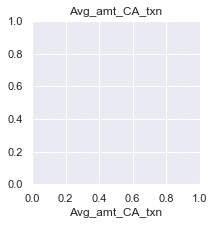

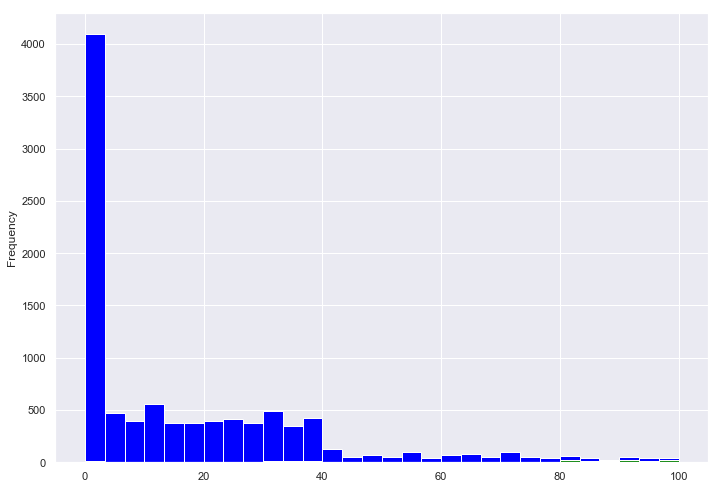

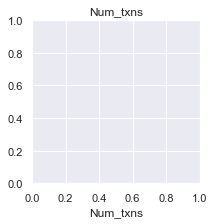

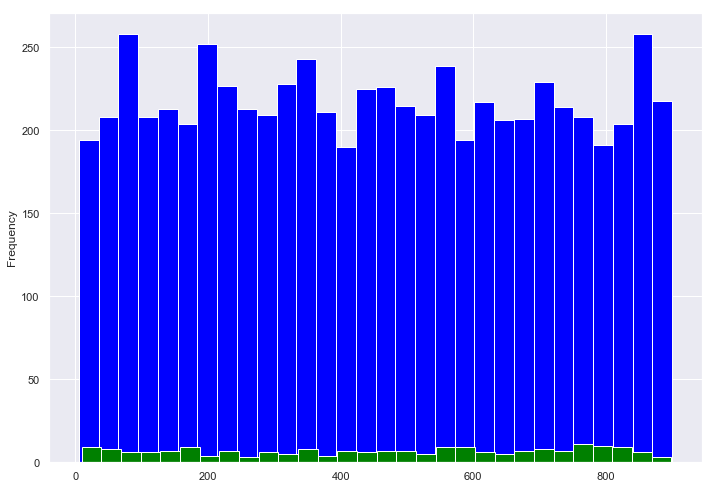

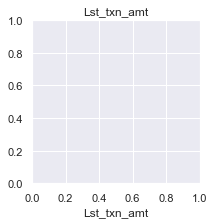

In [287]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    #df[var].hist(bins=20)
    df[df['Loan_Flag']==0][var].plot.hist(bins=30,color='blue',label='Loan_Flag=0')
    df[df['Loan_Flag']==1][var].plot.hist(bins=30, color='green',label='Loan_Flag=1')
    plt.figure(figsize=(3,3))
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyse_continous(master_data, var)

The understanding from the distribution of these plots is as follows:
1. The likely hood of buying loan is higher in the age bracket of 30 to 60. Also, there are outliners too in the age variable. This is a significant variable and will be divided into groups for better understanding.
2. The likelyhood of purchasing loan is more if the population is above 12M, and the population of 5M and around 1M has also contributed to the likelyhood of purchasing loan.
3. 'Density' is a better variable than population because it shows more clearly than population variable for the likelyhood of purchasing loan, i.e., the likelyhood of taking loan is higher in places where the density is very low or very high.
4. Fewer Low avg amount of CA transaction contributed to the likelyhood of buying loan, and there are outliners too in this variable. This will be checked futher with box-plot.
5. Fewer Number of transactions contributed to the likelyhood of buying loan. This will be checked futher with box-plot.
6. For every last tansaction amount value, there is more less contribution to the likelyhood of buying loan. This will be checked futher with box-plot.

*Outliers*

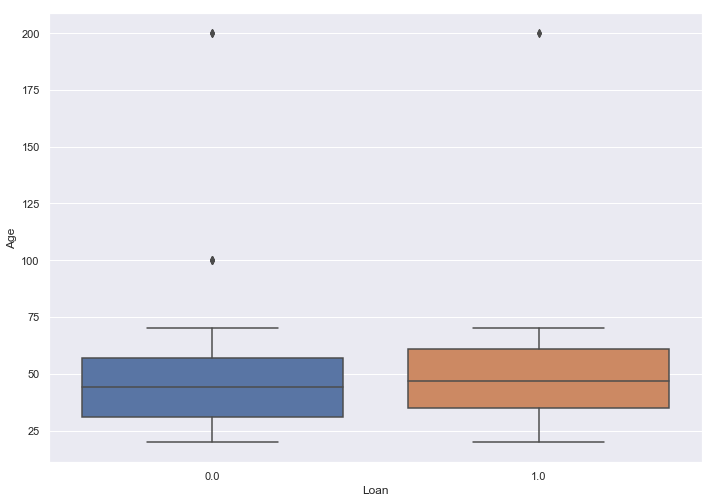

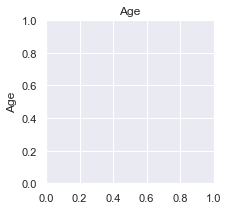

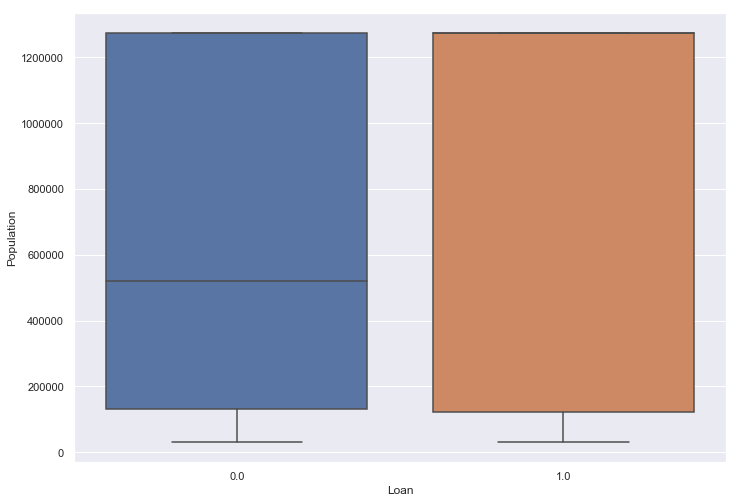

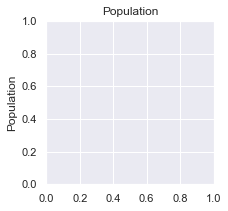

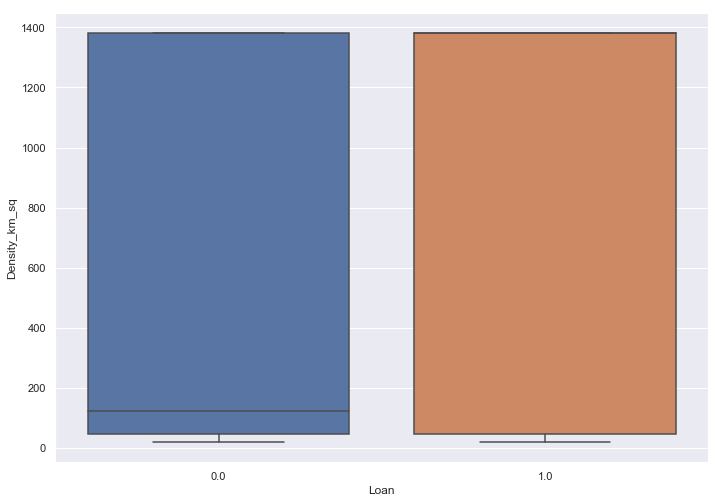

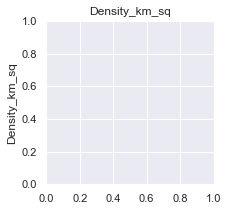

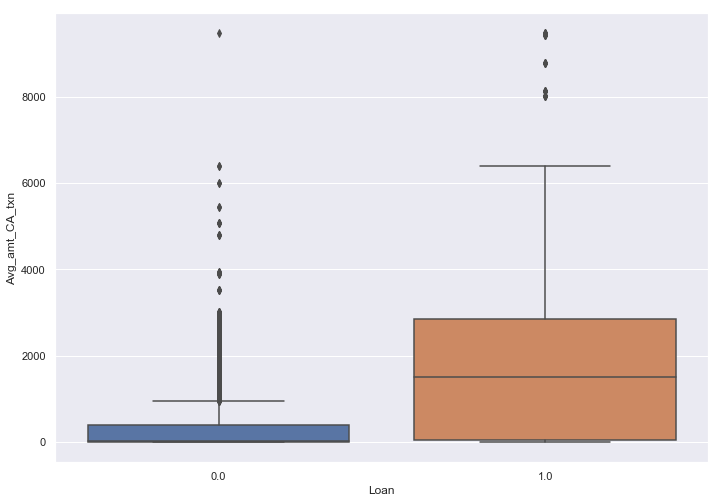

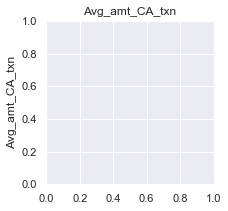

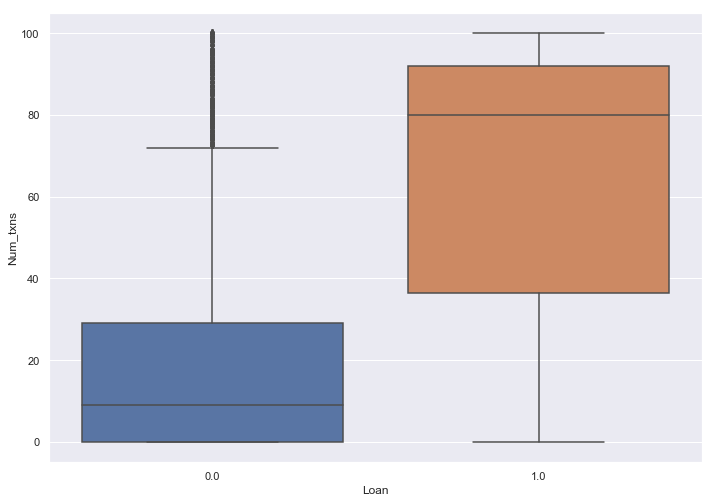

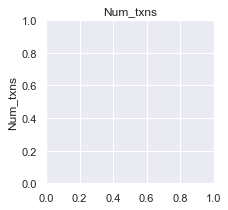

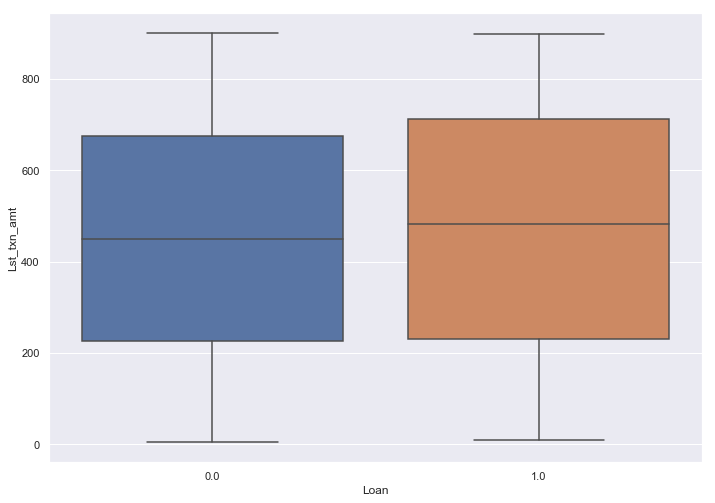

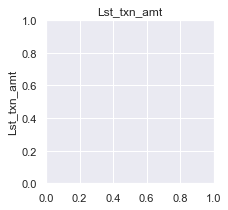

In [300]:
# let's make boxplots to visualise outliers in the continuous variables 

def find_outliers(df, var):
    df = df.copy()
    #df[var] = np.log(df[var])
    #df.boxplot(column=var)
    sns.boxplot(x=df['Loan_Flag'],y=df[var])
    plt.xlabel("Loan")
    plt.figure(figsize=(3,3))
    plt.title(var)
    plt.ylabel(var)
    plt.show()
    
    
for var in cont_vars:
    find_outliers(master_data, var)

The observations from above graphs is as follows:
1. 'Age' of 50% people who took loan falls between 30 to 60 years, with minimum age around 20 years and maximum as high as 70 years.
2. For the variable 'population' with loan purchased, no whisker are visible,i.e, the lower quartile is equal to the minimum value, and the upper quartile is equal to the maximum. This variable is not significant to take into account. 
3. With whiskers rarely visible,'Density' shares that the lower quartile is equal to the minimum value, and the upper quartile is equal to the maximum value,i.e., the people who purchased loan, are highly likely to fall under very low density areas, i.e, very low-populated areas or high density areas,i.e., densely-populated areas (major cities like Dublin). This variable is not significant to take into account. 
4. With the box-plot left skewed for loan purchase, the people who did Current Account transaction of average around 1500 are more likely to purchase loan with a minimum value of around 0 and as high as around 3000.
5. Majority of the people who purchased loan, did atleast 40 transactions and atmost 90 transactions with an average of 80 transactions from Current Account.
6. The average amount of Last transaction for the people who purchased loan varied from 200+ to around 650, with an average of around 450.

### Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [301]:
### Categorical variables

cat_vars = [var for var in master_data.columns if master_data[var].dtypes=='O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  6


In [302]:
# let's visualise the values of the categorical variables
master_data[cat_vars].head()

,Gender,County,Income_Grp,Province,Mrchnt_cde,Lst_txn_Nrtve
0,M,Cork,10001-40000,Munster,NaN,NaN
1,M,Cavan,0-10000,Ulster,7211,THE BRIDGE LAUNDRY WICKLOW TOWN
2,F,Dublin,10001-40000,Leinster,3667,LUXOR HOTEL/CASINO LAS VEGAS NV
3,M,Louth,40001-60000,Leinster,5712,HARVEY NORMAN CARRICKMINES
4,F,Kilkenny,60001-100000,Leinster,5999,PAYPAL *PETEWOODWAR 35314369001


#### Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

In [303]:
for var in cat_vars:
    print(var, len(master_data[var].unique()), ' categories')

Gender 2  categories
County 37  categories
Income_Grp 5  categories
Province 5  categories
Mrchnt_cde 562  categories
Lst_txn_Nrtve 5171  categories


Some of the categorical variables show low cardinality except County, Merchant Code and Lst Transaction Nerative, this means that these 3 have large number of different labels. We need to tackle high cardinality during our feature engineering step for these 3 variables.

Rare labels:
Let's go ahead and investigate now if there are labels that are present only in a small number of Labels:

In [292]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['Loan_Flag'].count() / len(df)
    return tmp[tmp<rare_perc]

for var in cat_vars:
    print(analyse_rare_labels(master_data, var, 0.01))
    print()

Series([], Name: Loan_Flag, dtype: float64)

County
Adare              0.000083
Ballina            0.000083
Borris             0.000083
Boyle              0.000083
Lahinch            0.000083
Maynooth           0.000083
Navan              0.000083
Northernireland    0.000083
Portlaoise         0.000083
Rosslare           0.000083
Sandyford          0.000083
Sligo              0.000083
Spain              0.000083
Trim               0.000083
Name: Loan_Flag, dtype: float64

Series([], Name: Loan_Flag, dtype: float64)

Series([], Name: Loan_Flag, dtype: float64)

Mrchnt_cde
742.0     0.001417
763.0     0.000833
780.0     0.001333
1520.0    0.001167
1711.0    0.001000
1731.0    0.001167
1740.0    0.000917
1750.0    0.000917
1761.0    0.000917
1771.0    0.001083
1799.0    0.000667
2741.0    0.001417
2791.0    0.001083
2842.0    0.001083
3000.0    0.001250
3001.0    0.001000
3004.0    0.001000
3005.0    0.000917
3006.0    0.001083
3007.0    0.000917
3008.0    0.000833
3009.0    0.000833
3010

'County','Merchant Code' and 'Last Transaction Nerative' categorical variable show multiple labels that are present in less than 1% of the Loans. We will engineer these variables in the following step. Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models.

Finally, we want to explore the relationship between the categories of the different variables and Loans:

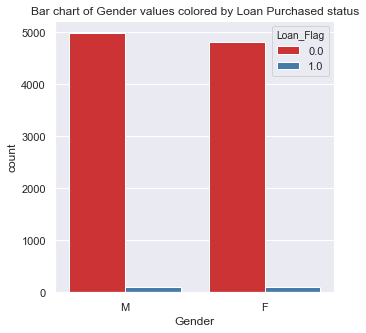

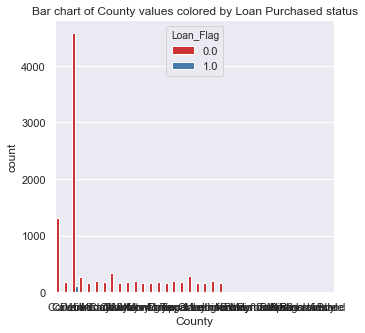

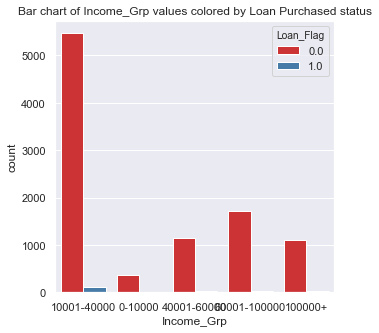

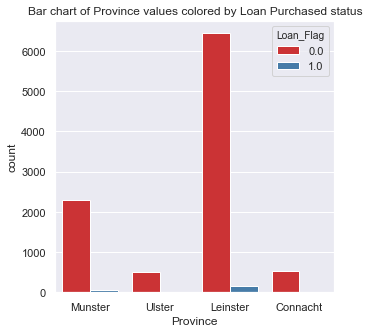

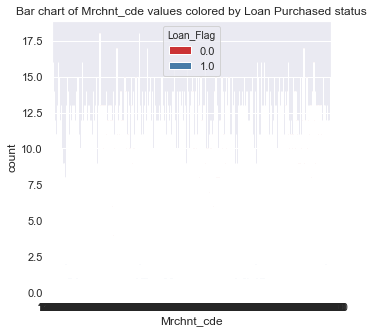

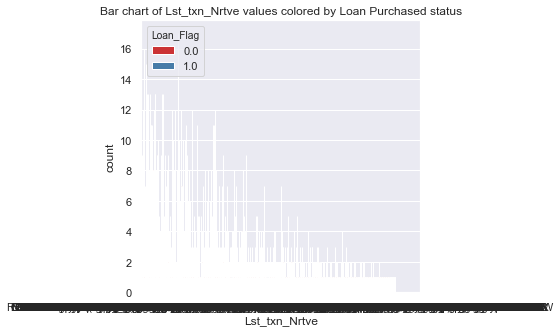

In [304]:
for var in cat_vars:
    analyse_discrete(master_data, var)

**Please continue to BOI_Challenge_Feat_Engg.ipynb**